# Heart Disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import seaborn as sns

# Colors

In [2]:
# Define the coolwarm color map
cmap = plt.cm.coolwarm
#cmap = plt.cm.Greens

palette1="coolwarm"
#palette1="Greens"


color1 = cmap(0.8) #Heart Disease
color2 = cmap(0.2) #Normal


# Importing dataset

In [3]:
# Load the dataset
heart_df = pd.read_csv('../../TeamProject/data/raw/heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Encoding

In [4]:
# Convert all columns to numeric data
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

heart_df_encoded = heart_df.copy()

# Apply encoding to non-numeric columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_columns:
    heart_df_encoded[col] = encoder.fit_transform(heart_df_encoded[col])

# Check the updated data types
print(heart_df_encoded.dtypes)

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object


# Raw Data Overview

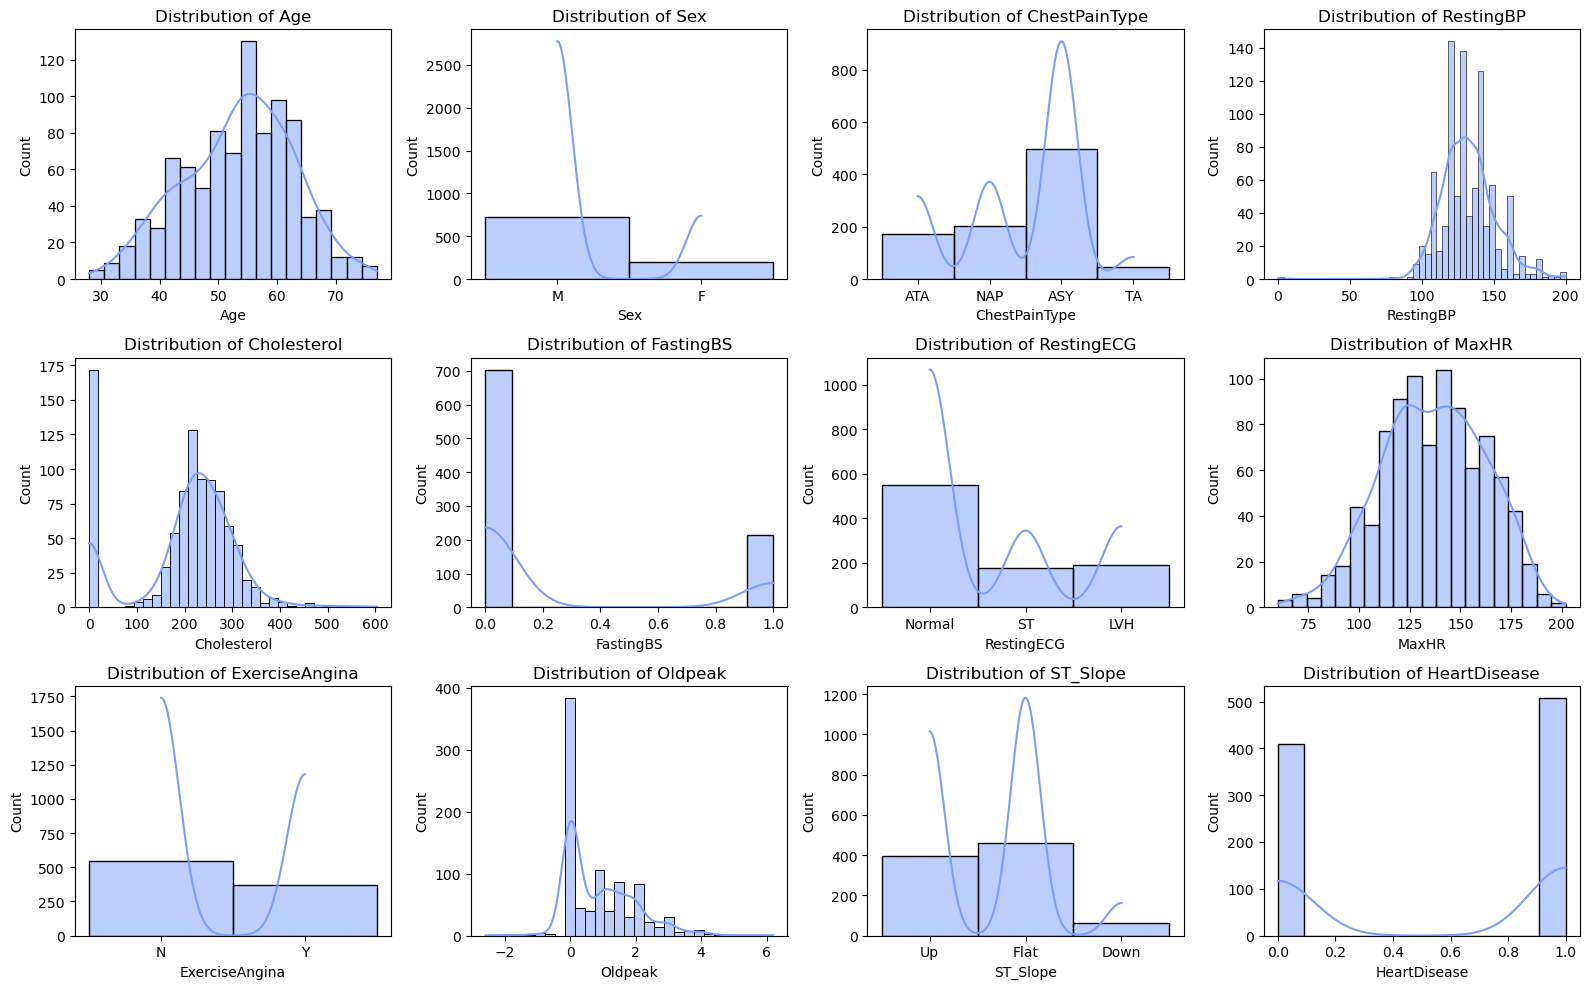

In [5]:
plt.figure(figsize=(16,10))
for i,col in enumerate(heart_df.columns,1):
    plt.subplot(3,4,i)
    plt.title(f"Distribution of {col}")
    sns.histplot(heart_df[col],kde=True, color=color2)
    plt.tight_layout()
    plt.plot()

plt.savefig("../images/Raw_data_Overview.png", dpi=300, bbox_inches='tight') 
plt.show()


In [6]:
import pandas as pd
avg_cholesterol_all = heart_df['Cholesterol'].mean()
avg_cholesterol_no_zeros = heart_df[heart_df['Cholesterol'] > 0]['Cholesterol'].mean()
avg_cholesterol_hd_all = heart_df[heart_df['HeartDisease'] == 1]['Cholesterol'].mean()
avg_cholesterol_hd_no_zeros = heart_df[(heart_df['Cholesterol'] > 0) & (heart_df['HeartDisease'] == 1)]['Cholesterol'].mean()

# Replace cholesterol = 0 with the avg_cholesterol_no_zeros
heart_df_replaced = heart_df.copy()
heart_df_replaced.loc[heart_df_replaced['Cholesterol'] == 0, 'Cholesterol'] = avg_cholesterol_no_zeros

# new average after replacing values
avg_cholesterol_replaced = heart_df_replaced['Cholesterol'].mean()

# DataFrame
cholesterol_summary = pd.DataFrame({
    'Metric': [
        'Avg Cholesterol (Whole Dataset)',
        'Avg Cholesterol (After Dropping Cholesterol = 0)',
        'Avg Cholesterol (Heart Disease - Whole Dataset)',
        'Avg Cholesterol (Heart Disease - After Dropping Cholesterol = 0)',
        'Avg Cholesterol (After Replacing Cholesterol = 0 with Avg)'
    ],
    'Value': [
        avg_cholesterol_all,
        avg_cholesterol_no_zeros,
        avg_cholesterol_hd_all,
        avg_cholesterol_hd_no_zeros,
        avg_cholesterol_replaced
    ]
})

print(cholesterol_summary)


                                              Metric       Value
0                    Avg Cholesterol (Whole Dataset)  198.799564
1   Avg Cholesterol (After Dropping Cholesterol = 0)  244.635389
2    Avg Cholesterol (Heart Disease - Whole Dataset)  175.940945
3  Avg Cholesterol (Heart Disease - After Droppin...  251.061798
4  Avg Cholesterol (After Replacing Cholesterol =...  244.635389


/var/folders/fd/zfd4k53n2kj37g0q2y1cgjr40000gn/T/ipykernel_60122/3562733768.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '244.6353887399464' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heart_df_replaced.loc[heart_df_replaced['Cholesterol'] == 0, 'Cholesterol'] = avg_cholesterol_no_zeros


In [7]:
heart_df_cholestrol = heart_df[heart_df['Cholesterol']==0]

In [8]:
heart_df_cholestrol.groupby('HeartDisease').size()

HeartDisease
0     20
1    152
dtype: int64

In [9]:
# records where Cholesterol = 0
heart_df_cholestrol = heart_df[heart_df['Cholesterol'] == 0]

#  HeartDisease for Cholesterol = 0
cholesterol_zero_disease = 100 * heart_df_cholestrol.groupby('HeartDisease').size() / heart_df_cholestrol.shape[0]
cholesterol_zero_disease


HeartDisease
0    11.627907
1    88.372093
dtype: float64

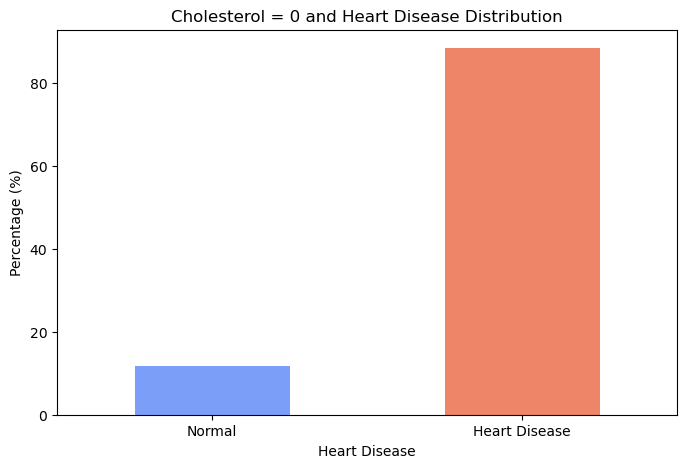

In [10]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 5))
cholesterol_zero_disease.plot(kind='bar', stacked=True, color=[color2, color1])
plt.title('Cholesterol = 0 and Heart Disease Distribution')
plt.ylabel('Percentage (%)')
plt.xlabel('Heart Disease')
plt.xticks([0, 1], ['Normal', 'Heart Disease'], rotation=0)

plt.savefig("../images/HeartDiseaseDistribution_cholesterol_zero.png", dpi=300, bbox_inches='tight') 
plt.show()

# Drop rows

In [11]:
# Drop columns with Cholesterol equal 0
heart_df = heart_df[heart_df['Cholesterol']!=0]

heart_df_encoded = heart_df_encoded[heart_df_encoded['Cholesterol']!=0]

heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Heatmap

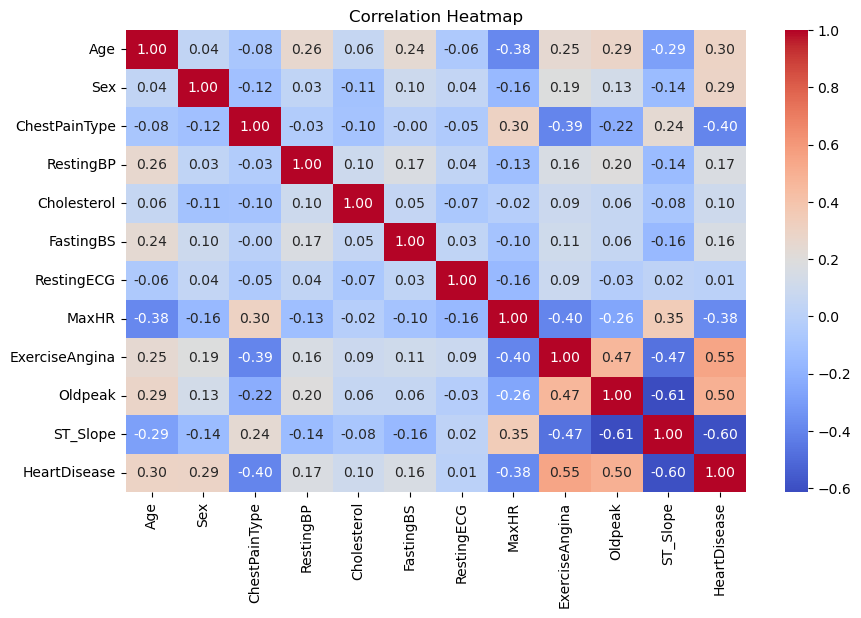

In [12]:
# Create a correlation heatmap to analyze the data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(heart_df_encoded.corr(), annot=True, cmap=palette1, fmt='.2f')
plt.title('Correlation Heatmap')

plt.savefig("../images/Heatmap.png", dpi=300, bbox_inches='tight') 
plt.show()


# ST_Slope vs OldPeak

In [24]:
heart_df['Oldpeak'].min()

-0.1

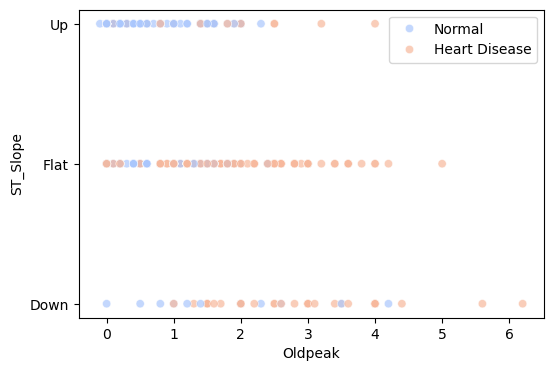

In [26]:
# build vizualization on Oldpeak readings and ST_slope records
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Scatter plot
scatter = sns.scatterplot(
    data=heart_df,
    x='Oldpeak',
    y='ST_Slope',
    hue='HeartDisease',
    palette=palette1,
    alpha=0.7
)

# Update legend labels
legend_labels = {0: "Normal", 1: "Heart Disease"}
handles, labels = scatter.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]

plt.legend(handles, new_labels)

# Save and show plot
plt.savefig("../images/ST_Slope_Old_Peak.png", dpi=300, bbox_inches='tight') 
plt.show()


# ST_Slope vs Oldpeak with proportions

In [15]:
heart_normal = heart_df[heart_df['HeartDisease']==0]
heart_disease = heart_df[heart_df['HeartDisease']==1]

#ST_Slope by Up, Flat and Down - Heart Disease
ST_up_disease = heart_disease[heart_disease['ST_Slope']=='Up']
ST_flat_disease = heart_disease[heart_disease['ST_Slope']=='Flat']
ST_down_disease = heart_disease[heart_disease['ST_Slope']=='Down']

#ST_Slope by Up, Flat and Down - Without Heart Disease
ST_up_normal = heart_normal[heart_normal['ST_Slope']=='Up']
ST_flat_normal = heart_normal[heart_normal['ST_Slope']=='Flat']
ST_down_normal = heart_normal[heart_normal['ST_Slope']=='Down']

#Proportion by ST_Slope
heart_STSlope_up = heart_df[heart_df['ST_Slope']=='Up']
heart_STSlope_flat = heart_df[heart_df['ST_Slope']=='Flat']
heart_STSlope_down = heart_df[heart_df['ST_Slope']=='Down']

STSlope_up = 100*heart_STSlope_up.groupby('HeartDisease').size()/heart_STSlope_up.shape[0]
STSlope_flat = 100*heart_STSlope_flat.groupby('HeartDisease').size()/heart_STSlope_flat.shape[0]
STSlope_down = 100*heart_STSlope_down.groupby('HeartDisease').size()/heart_STSlope_down.shape[0]

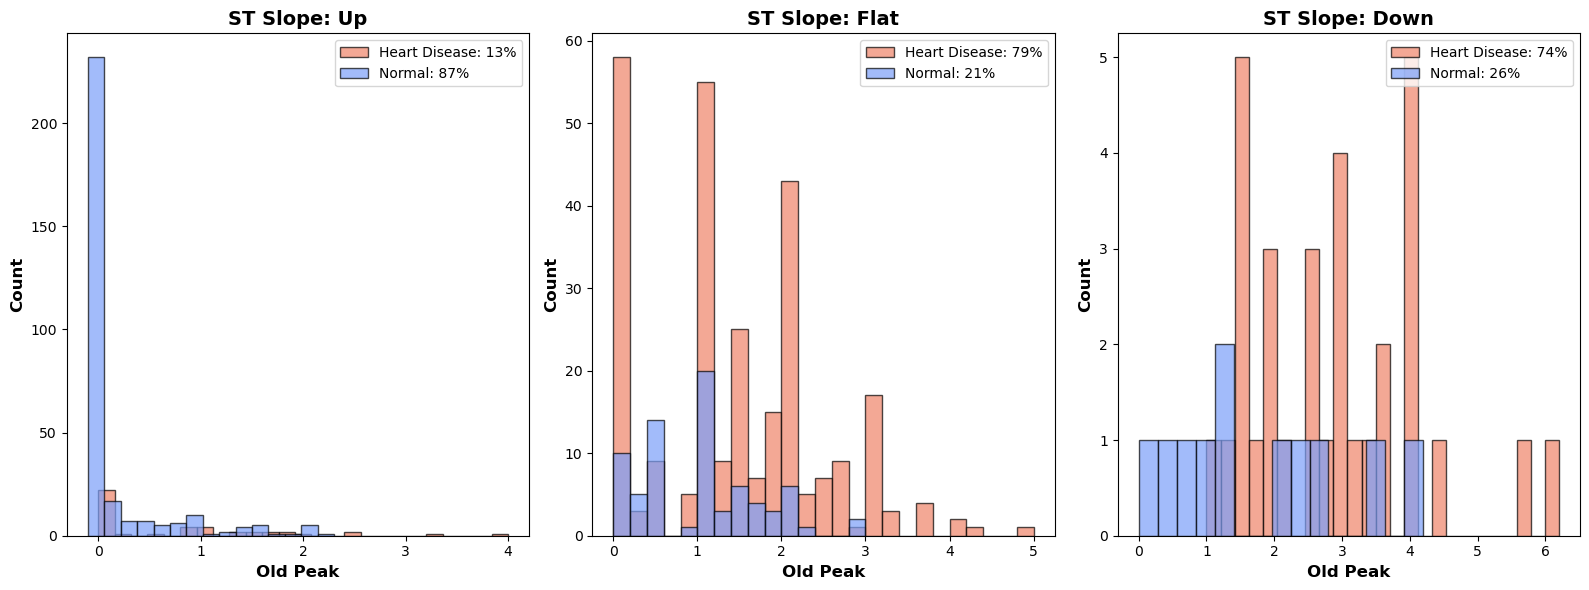

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6)) 

#---------UP---------#
# Normalize the data to map the palette correctly
axes[0].hist(ST_up_disease['Oldpeak'], bins=25, alpha=0.7, color=color1, edgecolor='black', label=f'Heart Disease: {STSlope_up.get(1, 0):.0f}%')
axes[0].hist(ST_up_normal['Oldpeak'], bins=15, alpha=0.7, color=color2, edgecolor='black', label=f'Normal: {STSlope_up.get(0, 0):.0f}%')

# Labels & title
axes[0].set_xlabel('Old Peak', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('ST Slope: Up', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)

#---------FLAT---------#
axes[1].hist(ST_flat_disease['Oldpeak'], bins=25, alpha=0.7, color=color1, edgecolor='black', label=f'Heart Disease: {STSlope_flat.get(1, 0):.0f}%')
axes[1].hist(ST_flat_normal['Oldpeak'], bins=15, alpha=0.7, color=color2, edgecolor='black', label=f'Normal: {STSlope_flat.get(0, 0):.0f}%')

# Labels & title
axes[1].set_xlabel('Old Peak', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('ST Slope: Flat', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=10)

#---------DOWN---------#
axes[2].hist(ST_down_disease['Oldpeak'], bins=25, alpha=0.7, color=color1, edgecolor='black', label=f'Heart Disease: {STSlope_down.get(1, 0):.0f}%')
axes[2].hist(ST_down_normal['Oldpeak'], bins=15, alpha=0.7, color=color2, edgecolor='black', label=f'Normal: {STSlope_down.get(0, 0):.0f}%')

# Labels & title
axes[2].set_xlabel('Old Peak', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[2].set_title('ST Slope: Down', fontsize=64,fontweight='bold')
axes[2].legend(loc='upper right', fontsize=10)

plt.tight_layout()

plt.savefig("../images/ST_slope_Oldpeak_proportions.png", dpi=300, bbox_inches='tight') 
plt.show()


# Data Overview -  dropped Cholesterol zero

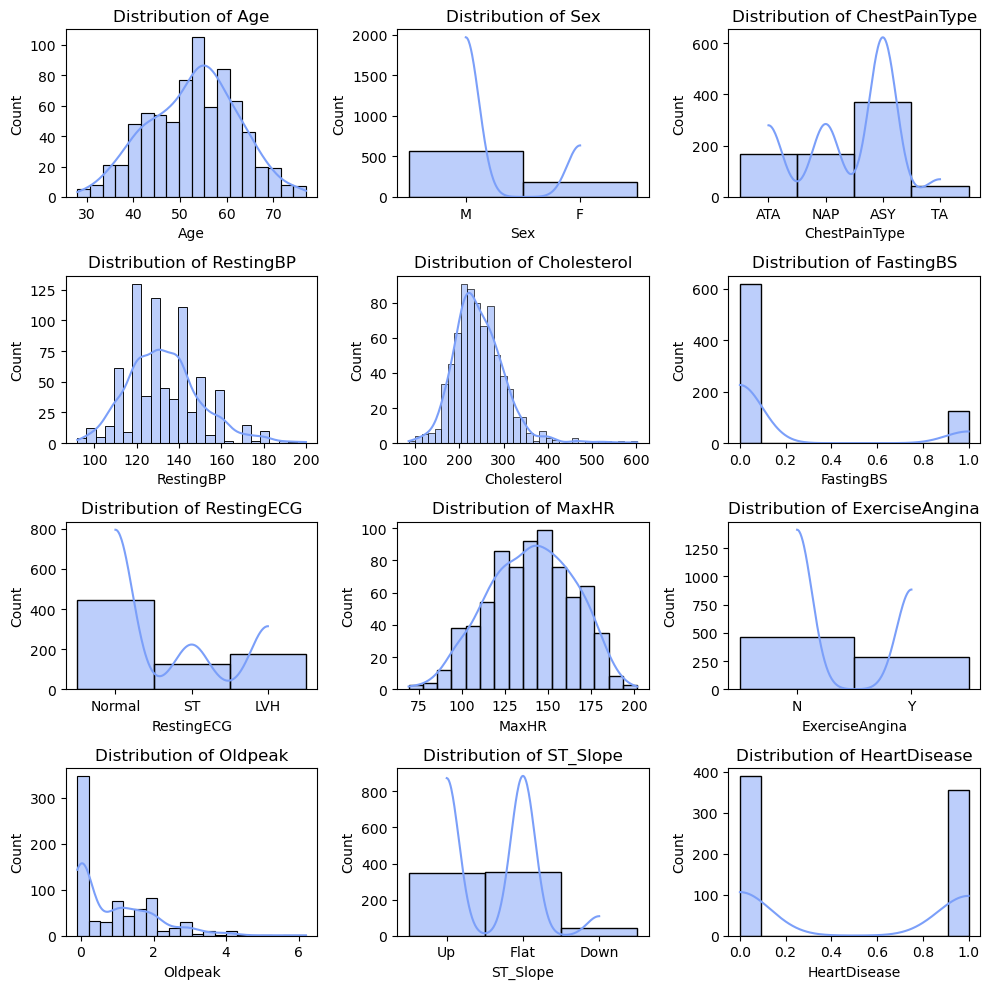

In [17]:
# Drop rows Cholesterol equal zero

plt.figure(figsize=(10,10))
for i,col in enumerate(heart_df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.histplot(heart_df[col],kde=True, color=color2)
    plt.tight_layout()
    plt.plot()

    plt.savefig("../images/Raw_data_Overview_drop_zero_cholesterol.png", dpi=300, bbox_inches='tight') 
plt.show()

In [ ]:
#Proportion by gender
heart_female = heart_df[heart_df['Sex']=='F']
heart_male = heart_df[heart_df['Sex']=='M']

female = 100*heart_female.groupby('HeartDisease').size()/heart_female.shape[0]
male = 100*heart_male.groupby('HeartDisease').size()/heart_male.shape[0]

#Proportion by ChestPainType
heart_TA = heart_df[heart_df['ChestPainType']=='TA']
heart_NAP = heart_df[heart_df['ChestPainType']=='NAP']
heart_ATA = heart_df[heart_df['ChestPainType']=='ATA']
heart_ASY = heart_df[heart_df['ChestPainType']=='ASY']

TA = 100*heart_TA.groupby('HeartDisease').size()/heart_TA.shape[0]
NAP = 100*heart_NAP.groupby('HeartDisease').size()/heart_NAP.shape[0]
ATA = 100*heart_ATA.groupby('HeartDisease').size()/heart_ATA.shape[0]
ASY = 100*heart_ASY.groupby('HeartDisease').size()/heart_ASY.shape[0]

#Proportion by Resting ECG

heart_LVH = heart_df[heart_df['RestingECG']=='LVH']
heart_ECGNormal = heart_df[heart_df['RestingECG']=='Normal']
heart_ST = heart_df[heart_df['RestingECG']=='ST']

LVH = 100*heart_LVH.groupby('HeartDisease').size()/heart_LVH.shape[0]
ECGNormal = 100*heart_ECGNormal.groupby('HeartDisease').size()/heart_ECGNormal.shape[0]
ST = 100*heart_ST.groupby('HeartDisease').size()/heart_ST.shape[0]

#Proportion by ExerciseAngina

heart_ExerciseAngina_y = heart_df[heart_df['ExerciseAngina']=='Y']
heart_ExerciseAngina_n = heart_df[heart_df['ExerciseAngina']=='N']

ExerciseAngina_y = 100*heart_ExerciseAngina_y.groupby('HeartDisease').size()/heart_ExerciseAngina_y.shape[0]
ExerciseAngina_n = 100*heart_ExerciseAngina_n.groupby('HeartDisease').size()/heart_ExerciseAngina_n.shape[0]

#Proportion by ST_Slope

heart_STSlope_up = heart_df[heart_df['ST_Slope']=='Up']
heart_STSlope_flat = heart_df[heart_df['ST_Slope']=='Flat']
heart_STSlope_down = heart_df[heart_df['ST_Slope']=='Down']

STSlope_up = 100*heart_STSlope_up.groupby('HeartDisease').size()/heart_STSlope_up.shape[0]
STSlope_flat = 100*heart_STSlope_flat.groupby('HeartDisease').size()/heart_STSlope_flat.shape[0]
STSlope_down = 100*heart_STSlope_down.groupby('HeartDisease').size()/heart_STSlope_down.shape[0]

#Proportion by FastingBS

heart_fastingBS_high = heart_df[heart_df['FastingBS']==1]
heart_fastingBS_low = heart_df[heart_df['FastingBS']==0]

fastingBS_high = 100*heart_fastingBS_high.groupby('HeartDisease').size()/heart_fastingBS_high.shape[0]
fastingBS_low = 100*heart_fastingBS_low.groupby('HeartDisease').size()/heart_fastingBS_low.shape[0]

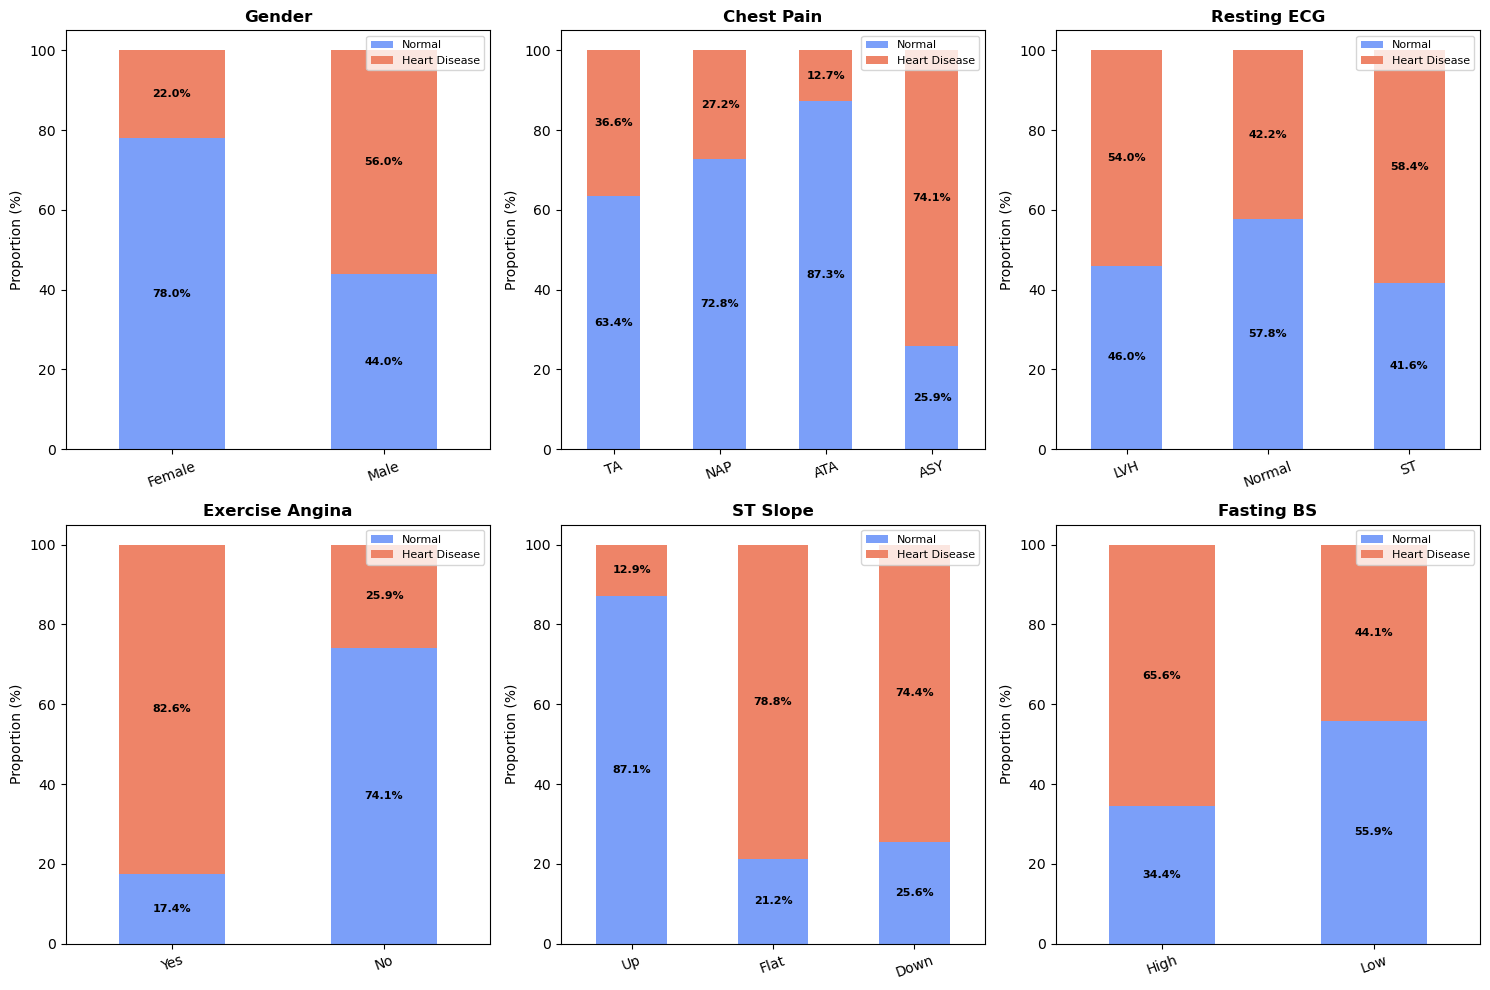

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for each category
data = {
    "Gender": {"Female": female, "Male": male},
    "Chest Pain": {"TA": TA, "NAP": NAP, "ATA": ATA, "ASY": ASY},
    "Resting ECG": {"LVH": LVH, "Normal": ECGNormal, "ST": ST},
    "Exercise Angina": {"Yes": ExerciseAngina_y, "No": ExerciseAngina_n},
    "ST Slope": {"Up": STSlope_up, "Flat": STSlope_flat, "Down": STSlope_down},
    "Fasting BS": {"High": fastingBS_high, "Low": fastingBS_low}
}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  
#colors = [cmap(0.2), cmap(0.8)]  
colors = [color2, color1]  

# Plot each category
for ax, (title, prop_data) in zip(axes, data.items()):
    df = pd.DataFrame(prop_data).T  # Convert dictionary to DataFrame
    df.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Proportion (%)")
    ax.legend(labels=["Normal", "Heart Disease"], fontsize=8)
    ax.tick_params(axis='x', rotation=20)
    
    # Add percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=8, weight="bold")

# Adjust layout
plt.tight_layout()

plt.savefig("../images/proportions_categorical_features.png", dpi=300, bbox_inches='tight') 
plt.show()



/var/folders/fd/zfd4k53n2kj37g0q2y1cgjr40000gn/T/ipykernel_60122/3346806088.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_1['AgeGroup'] = pd.cut(df_heart_1['Age'], bins=age_bins, labels=age_labels, right=False)
/var/folders/fd/zfd4k53n2kj37g0q2y1cgjr40000gn/T/ipykernel_60122/3346806088.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_0['AgeGroup'] = pd.cut(df_heart_0['Age'], bins=age_bins, labels=age_labels, right=False)
/var/folders/fd/zfd4k53n2kj37g0q2y1cgjr40000gn/T/ipykernel_6

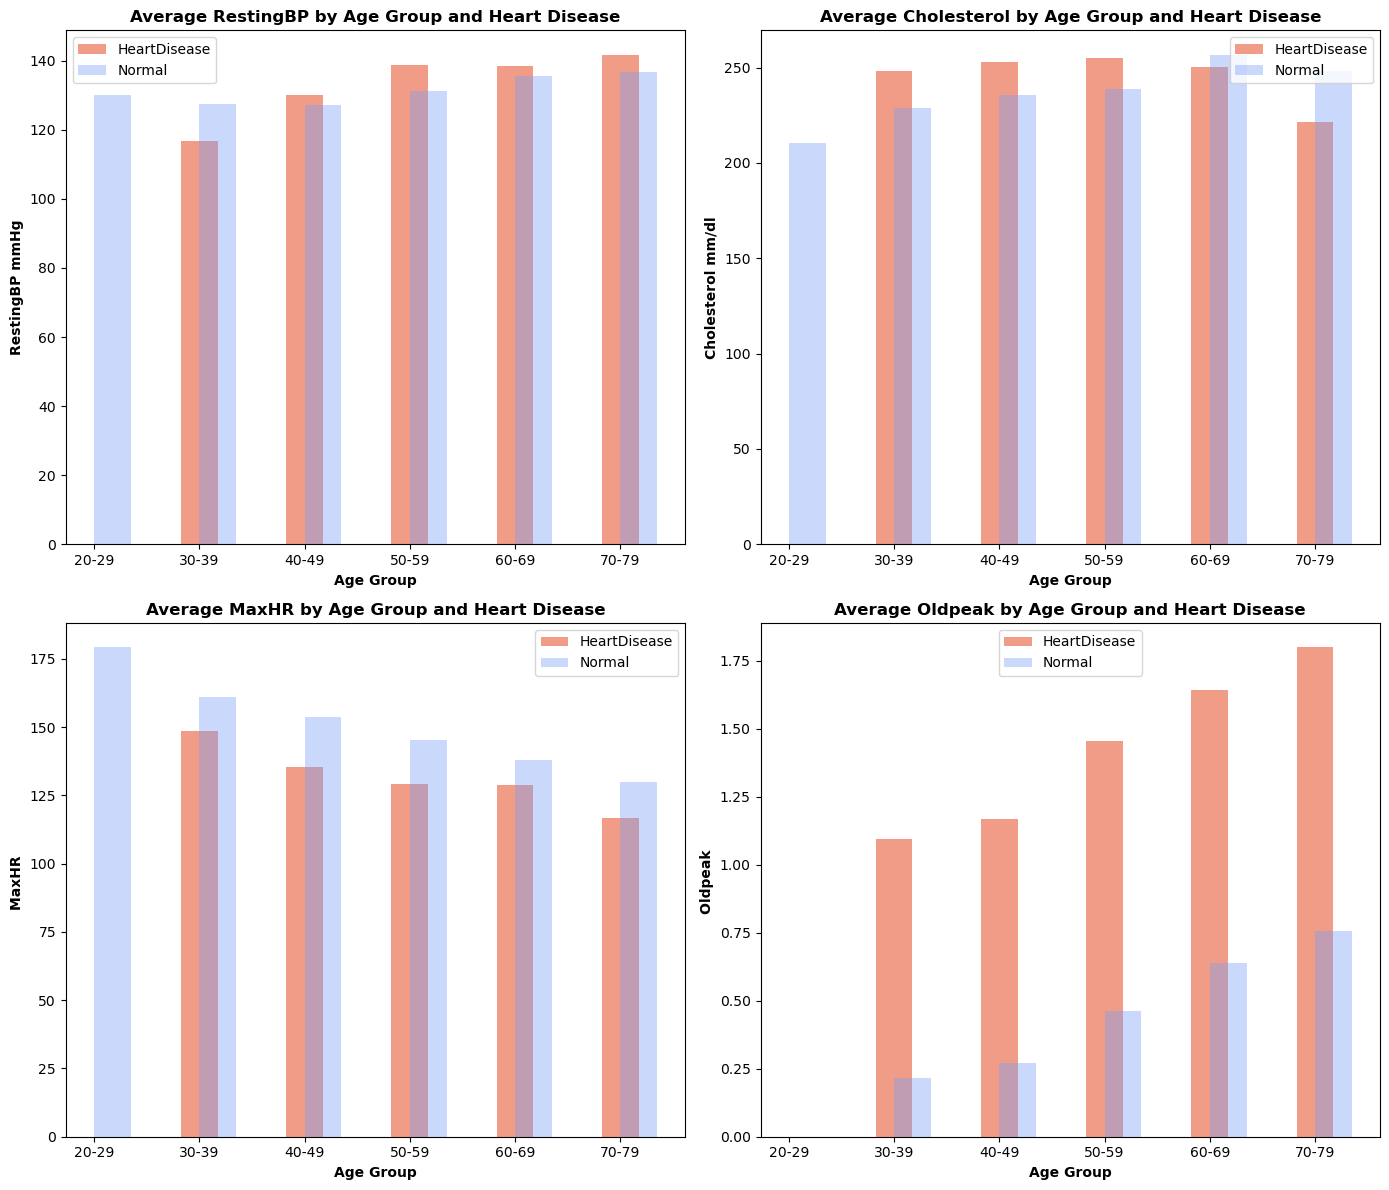

In [ ]:
# Filter data for HeartDisease = 1 and HeartDisease = 0
df_heart_1 = heart_df[heart_df['HeartDisease'] == 1]
df_heart_0 = heart_df[heart_df['HeartDisease'] == 0]

# Define age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_heart_1['AgeGroup'] = pd.cut(df_heart_1['Age'], bins=age_bins, labels=age_labels, right=False)
df_heart_0['AgeGroup'] = pd.cut(df_heart_0['Age'], bins=age_bins, labels=age_labels, right=False)

# Features to plot
features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
units = ['mmHg', 'mm/dl', '', '']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Generate bar graphs for both groups
bar_width = 0.35  # Width of each bar
for i, feature in enumerate(features):
    ax = axes[i]
    
    # Aggregate mean values for each age group for HeartDisease = 1
    grouped_data_1 = df_heart_1.groupby('AgeGroup')[feature].mean().reset_index()
    
    # Aggregate mean values for each age group for HeartDisease = 0
    grouped_data_0 = df_heart_0.groupby('AgeGroup')[feature].mean().reset_index()
    
    # Plot the bar graph for HeartDisease = 1 and HeartDisease = 0 side by side
    ax.bar(grouped_data_1['AgeGroup'], grouped_data_1[feature], color=color1, alpha=0.8, width=bar_width, label="HeartDisease", align='center')
    ax.bar(grouped_data_0['AgeGroup'], grouped_data_0[feature], color=color2, alpha=0.4, width=bar_width, label="Normal", align='edge')
    
    # Title and labels
    ax.set_title(f'Average {feature} by Age Group and Heart Disease', fontsize=12, fontweight='bold')
    ax.set_xlabel('Age Group', fontsize=10, fontweight='bold')
    ax.set_ylabel(f'{feature} {units[i]}', fontsize=10, fontweight='bold')
    
    
    # Adding legend
    ax.legend()

# Adjust layout
plt.tight_layout()

#plt.savefig("../images/distributions_features_over_age.png", dpi=300, bbox_inches='tight') 
plt.show()

/var/folders/fd/zfd4k53n2kj37g0q2y1cgjr40000gn/T/ipykernel_60122/2542511669.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = heart_df.groupby('AgeGroup')['HeartDisease'].count()  # Total individuals per age group
/var/folders/fd/zfd4k53n2kj37g0q2y1cgjr40000gn/T/ipykernel_60122/2542511669.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_hd_counts = heart_df.groupby('AgeGroup')['HeartDisease'].sum()  # Heart disease cases
/var/folders/fd/zfd4k53n2kj37g0q2y1cgjr40000gn/T/ipykernel_60122/2542511669.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to Tr

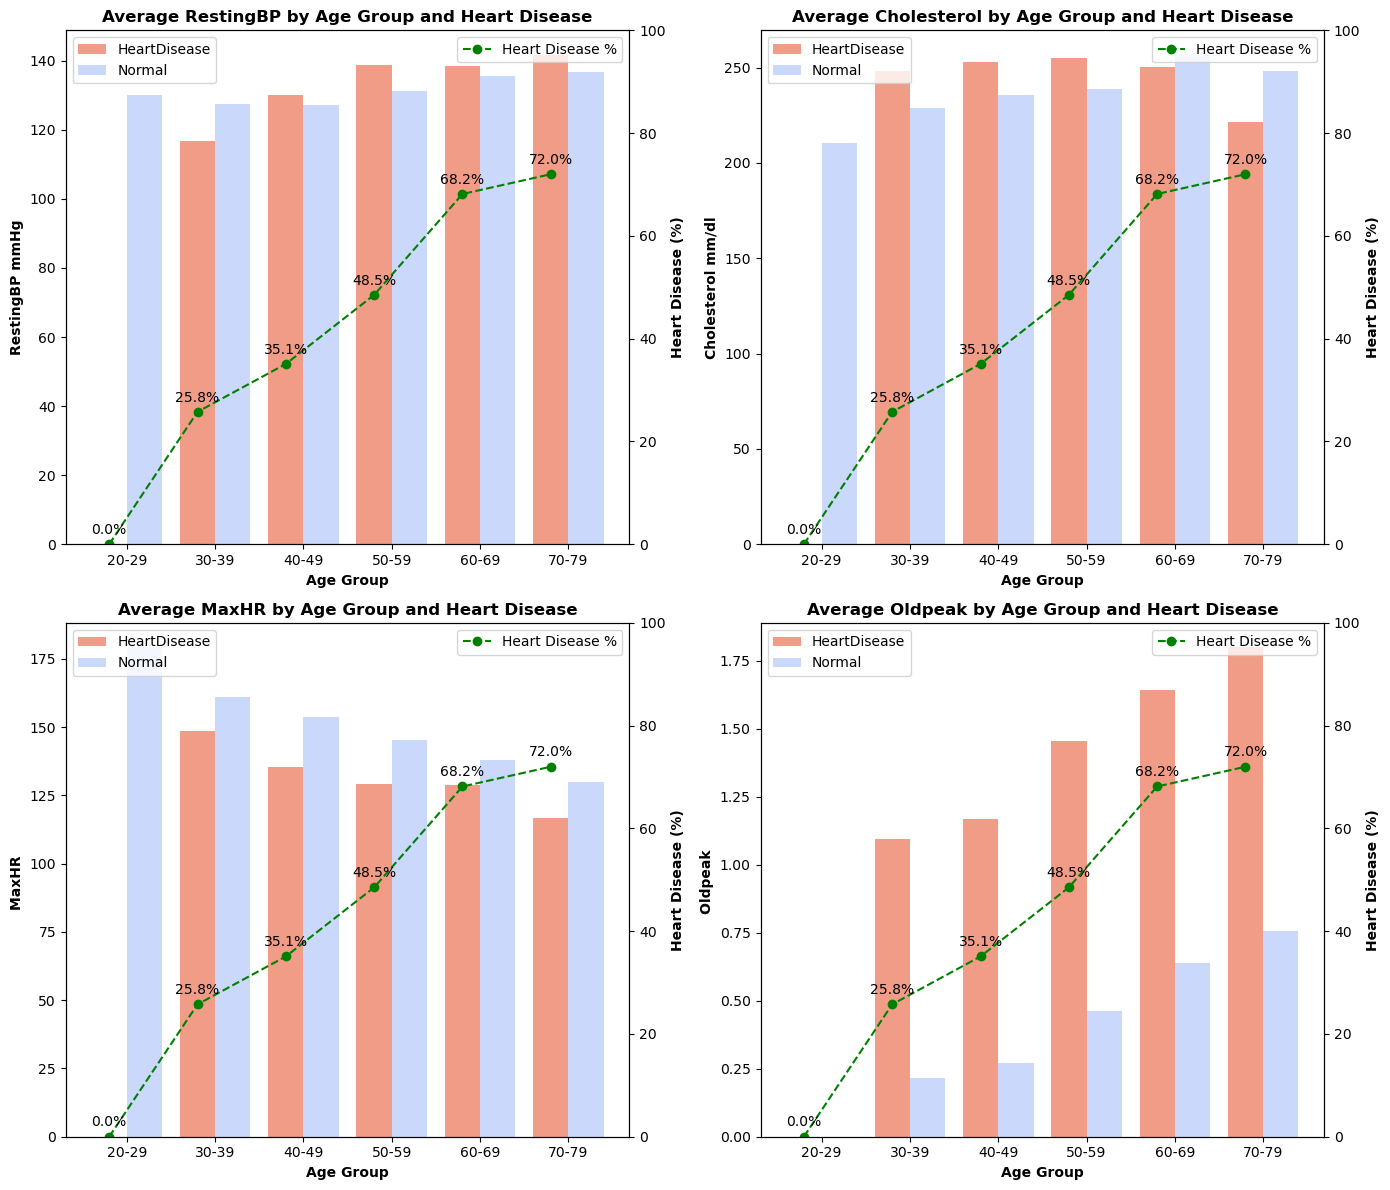

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for HeartDisease = 1 and HeartDisease = 0
df_heart_1 = heart_df[heart_df['HeartDisease'] == 1].copy()
df_heart_0 = heart_df[heart_df['HeartDisease'] == 0].copy()

# Define age bins and labels (Removed 80+ bin)
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
heart_df['AgeGroup'] = pd.cut(heart_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Features to plot
features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
units = ['mmHg', 'mm/dl', '', '']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

bar_width = 0.4  # Adjust width

# Compute proportions of heart disease cases per age group
age_counts = heart_df.groupby('AgeGroup')['HeartDisease'].count()  # Total individuals per age group
age_hd_counts = heart_df.groupby('AgeGroup')['HeartDisease'].sum()  # Heart disease cases
age_hd_proportion = (age_hd_counts / age_counts * 100).reindex(age_labels).fillna(0)  # Convert to percentage

# Generate bar graphs for both groups
for i, feature in enumerate(features):
    ax = axes[i]

    # Aggregate mean values for each age group and ensure they align with `age_labels`
    grouped_data_1 = df_heart_1.groupby('AgeGroup')[feature].mean().reindex(age_labels).fillna(0)
    grouped_data_0 = df_heart_0.groupby('AgeGroup')[feature].mean().reindex(age_labels).fillna(0)

    # X positions for bars
    x = range(len(age_labels))

    # Plot bars side by side
    ax.bar(x, grouped_data_1, color=color1, alpha=0.8, width=bar_width, label="HeartDisease")
    ax.bar([pos + bar_width for pos in x], grouped_data_0, color=color2, alpha=0.4, width=bar_width, label="Normal")

    # X-axis labels
    ax.set_xticks([pos + bar_width / 2 for pos in x])
    ax.set_xticklabels(age_labels)

    # Title and labels
    ax.set_title(f'Average {feature} by Age Group and Heart Disease', fontsize=12, fontweight='bold')
    ax.set_xlabel('Age Group', fontsize=10, fontweight='bold')
    ax.set_ylabel(f'{feature} {units[i]}', fontsize=10, fontweight='bold')
    
    # Add secondary y-axis for proportion of heart disease
    ax2 = ax.twinx()
    ax2.plot(x, age_hd_proportion, color='green', marker='o', linestyle='dashed', label="Heart Disease %")
    ax2.set_ylabel("Heart Disease (%)", fontsize=10, fontweight='bold')
    ax2.set_ylim(0, 100)  # Proportions in percentage (0-100%)

    # Add percentage text annotations
    for idx, proportion in enumerate(age_hd_proportion):
        ax2.text(idx, proportion + 2, f'{proportion:.1f}%', ha='center', fontsize=10, color='black')

    # Add legends
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig("../images/distributions_features_over_age.png", dpi=300, bbox_inches='tight')
plt.show()
